# Sverdrup calculation for the global ocean

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd

In [3]:
# load wind stress data by Trenberth (1989)
ds=nc.Dataset('trenberth_wind_data.nc')
ds.variables.keys()
# load ocean basin
basin=np.genfromtxt('basin_mask.csv',delimiter=',').T

In [4]:
lon=ds['X'][:]
lat=ds['Y'][:]
curl=ds['curl'][:]
curl[basin==0]=np.nan

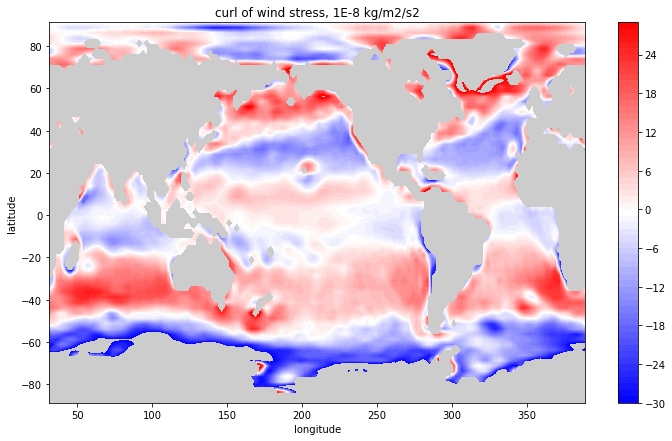

In [5]:
# Pacific-centered map
curl2=np.roll(curl,60,1)
lon2=np.arange(lon[-60],360+lon[-60],2.5)
# display wind stress curl
plt.figure(figsize=(12,7))
plt.rcParams['axes.facecolor']=[.8,.8,.8]
ct=np.arange(-30,30,1)
plt.contourf(lon2,lat,curl2,ct,cmap='bwr')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('curl of wind stress, 1E-8 kg/m2/s2')
plt.colorbar()
plt.show()

In [6]:
# Sverdrup calculation
beta = 1.0E-11
rho = 1025.0
x,y=np.meshgrid(lon,lat)
Nx=np.size(lon)
Ny=np.size(lat)
dX=-2.5E+5
Psi=np.zeros((Ny,Nx))

In [7]:
# integrate zonally (in units of Sv)
curl2[np.isnan(curl2)]=0
for n in range(Nx-1,0,-1):
    Psi[:,n-1]=Psi[:,n]+dX/(rho*beta)*curl2[:,n]*1.0E-14
    # apply boundary condition
    Psi[curl2==0]=0 

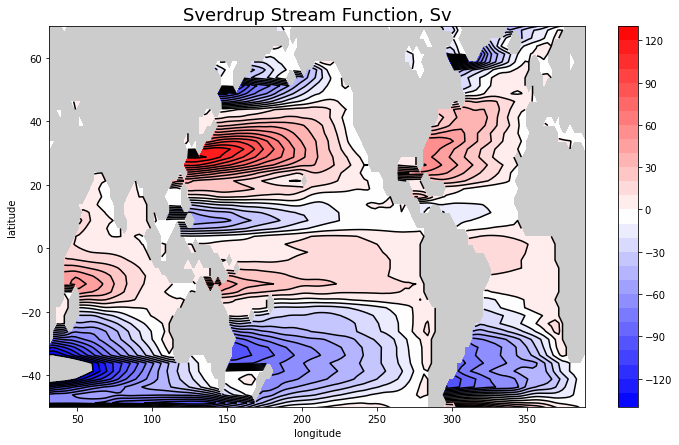

In [8]:
# Display Sverdrup Stream Function
plt.figure(figsize=(12,7))
Psi[curl2==0]=np.nan
plt.rcParams['axes.facecolor']=[.8,.8,.8]
ct=np.arange(-140,140,10)
plt.contourf(lon2,lat,Psi,ct,cmap='bwr')
plt.colorbar()
plt.contour(lon2,lat,Psi,ct,colors='k',linestyles='solid')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Sverdrup Stream Function, Sv',fontsize=18)
plt.ylim([-50,70])
plt.show()